# Automated Classification of Natural Scene Images for Smart Environmental Tagging
In industries like tourism, environmental monitoring, urban planning, and geographic information systems (GIS), there is a growing need to automatically tag and categorize large volumes of landscape images. Manual labeling is time-consuming and inconsistent, especially when dealing with image data collected from drones, satellites, or on-the-ground sources.

This project uses the Intel Image Classification dataset to train a deep learning model that can automatically classify landscape images into six real-world categories: buildings, forest, glacier, mountain, sea, and street.

By using FastAI and transfer learning, the project aims to demonstrate how quickly and effectively a reliable classifier can be built and used to support applications like:

**Automatic image tagging**

**Real-time camera feed analysis**

**Image organization and search**

**Environmental scene recognition in mobile or web apps**

In [61]:
# the libraries
from pathlib import Path
from fastbook import *
from fastai.vision.all import *
from fastdownload import download_url
from fastai.vision.widgets import ImageClassifierCleaner
from ipywidgets import VBox, Label

### Image files accessment and preparation.

In [63]:
directory = Path('C:\\Users\\LENOVO T460S\OneDrive\\Desktop\\intel_dataset')
path_train= directory/'seg_train'/'seg_train'
path_test = directory/'seg_test'/'seg_test'
path_pred = directory/'seg_pred'

print(f'The number of training files: {len(get_image_files(path_train))}')
print(f'The number of testing files: {len(get_image_files(path_test))}')
print(f'The number of predicting files: {len(get_image_files(path_pred))}')

The number of training files: 14034
The number of testing files: 3000
The number of predicting files: 7301


In [76]:
# Sample image dimentions.

train_img=Image.open(get_image_files(path_train)[1])
print(test_img.to_thumb(400))
test_img=Image.open(get_image_files(path_test)[1])
print(test_img.to_thumb(400))

<PIL.Image.Image image mode=RGB size=150x150>
<PIL.Image.Image image mode=RGB size=150x150>


In [79]:
#Corrupted images. This may affect model training if not filtered out or deleted.

corrupt = verify_images(get_image_files(directory))
corrupt.map(directory.unlink)
print(f'The number of images that failed to download or got corrupt: {len(corrupt)}')

The number of images that failed to download or got corrupt: 0


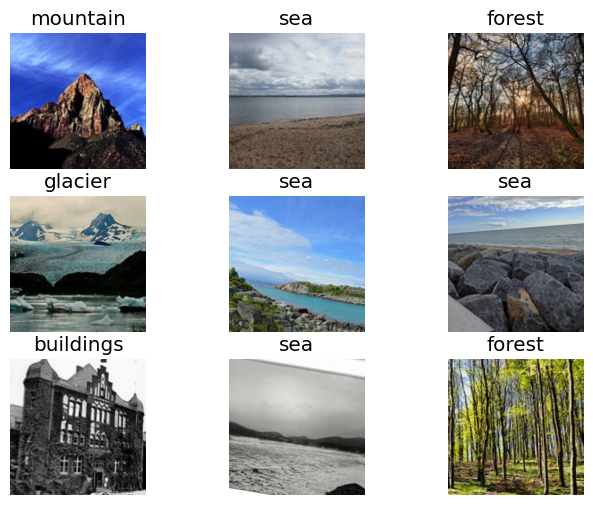

In [80]:
dls = ImageDataLoaders.from_folder(
    path_train,
    valid_pct=0.2,         #20% of training data as validation
    seed=42,
    item_tfms=Resize(224), # resize all images to 224x224
    batch_tfms=aug_transforms())  # augmentations


dls.show_batch(max_n=9, figsize=(8, 6))

### Model training and evaluation.

In [81]:
learn = vision_learner(dls, resnet18, metrics=accuracy)  #Training model on image data.
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.553214,0.324443,0.897363,39:26


epoch,train_loss,valid_loss,accuracy,time
0,0.316540,0.227361,0.930150,49:16
1,0.238865,0.213856,0.929437,50:14
2,0.143519,0.195665,0.935495,50:12


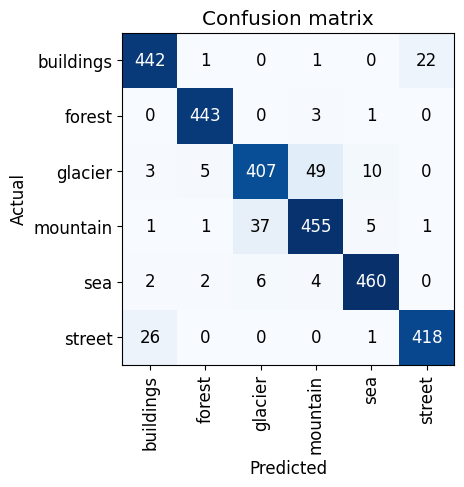

In [85]:
# Evaluation of model.

evaluation = ClassificationInterpretation.from_learner(learn)
evaluation.plot_confusion_matrix()

Generally the model performs good at classifying environmental scenes into their various relevant categories. 

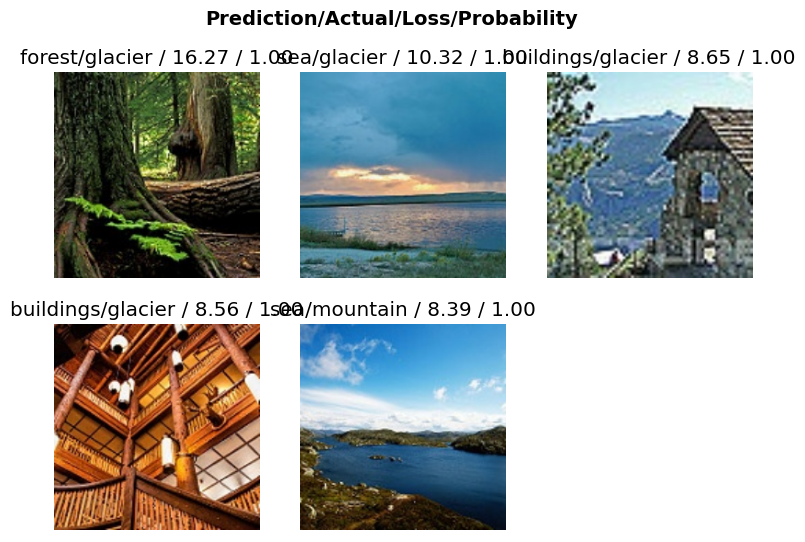

In [86]:
# Top losses.
evaluation.plot_top_losses(5)

In [87]:
# Cleaning data.

cleaner=ImageClassifierCleaner(learn)
cleaner

In [89]:
# Making predictions.

test_files = get_image_files(path_test)
test_dl = learn.dls.test_dl(test_files)

preds, _ = learn.get_preds(dl=test_dl)
pred_labels = preds.argmax(dim=1)

# Map predicted indices back to class names
class_names = learn.dls.vocab
pred_class_names = [class_names[i] for i in pred_labels]

# Show a few predictions
for img, label in zip(test_files[:5], pred_class_names[:5]):
    print(f'{img.name}: {label}')


20057.jpg: buildings
20060.jpg: buildings
20061.jpg: buildings
20064.jpg: buildings
20073.jpg: buildings


In [99]:
# Model saved.
learn.export()